Collatz binary notebook

In [9]:
"""
This notebook analyses collatz sequences from a binary perspective.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = int('1010100001', 2)
# START_VALUE = int('10101010101', 2) # Best Case
# START_VALUE = int('11111111111', 2) # Worst Case
# START_VALUE = int('1111', 2)
# START_VALUE = int('1110010111111', 2) # High Beta
# START_VALUE = 99999
# START_VALUE = 15

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Filter odd values
analysis_frame = analysis_frame[analysis_frame["odd"] == 1]
analysis_frame = analysis_frame.reset_index(drop=True)

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["vi_log"] = analysis_frame["collatz"].apply(log2)
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame["beta"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"]) 
analysis_frame["beta_prod"] = analysis_frame["beta"].cumprod() 

analysis_frame["alpha"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha"] = analysis_frame["alpha"].astype("int64")
analysis_frame["alpha_sum"] = analysis_frame["alpha"].cumsum()
analysis_frame["alpha_pred"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_diff"] = analysis_frame["alpha_sum"] - analysis_frame["alpha_pred"]
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

bin_len1 = len(analysis_frame["bin_str"][0])
analysis_frame["bin_len1"] = bin_len1
analysis_frame["next_bin_str"] = analysis_frame["next_odd"].apply(com.to_binary)
analysis_frame["next_bin_len"] = analysis_frame["next_bin_str"].apply(len)
analysis_frame["bin_growth"] = analysis_frame["next_bin_len"] - bin_len1

# Print data
beta_max = analysis_frame["beta_prod"].max()

print_frame = analysis_frame[[
    "n", "v1", "collatz", "vi_log", "next_odd", "alpha_sum", "alpha_pred", "alpha_max", 
    "beta", "beta_prod", "bin_str", "bin_len", "bin_growth"]]

print_frame.columns = [
    "n","v1", "vi", "vi_log", "vi+1", 
    "a", "a_pred", "a_max", "b", "b_prod", 
    "bin_str", "bin_len", "bin_growth"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "Beta max: ", beta_max, "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 79  K: 3 Beta max:  1.5984451540984603 

  n  v1   vi    vi_log vi+1   a  a_pred  a_max         b    b_prod    bin_str  bin_len  bin_growth
  1  79   79  6.303781  119   1       2      8  1.004219  1.004219    1001111        7           0
  2  79  119  6.894818  179   2       4     10  1.002801  1.007032    1110111        7           1
  3  79  179  7.483816  269   3       5     12  1.001862  1.008908   10110011        8           2
  4  79  269  8.071462  101   6       7     13  1.001239  1.010158  100001101        9           0
  5  79  101  6.658211   19  10       8     15  1.003300  1.013492    1100101        7          -2
  6  79   19  4.247928   29  11      10     16  1.017544  1.031272      10011        5          -2
  7  79   29  4.857981   11  14      12     18  1.011494  1.043126      11101        5          -3
  8  79   11  3.459432   17  15      13     19  1.030303  1.074736       1011        4          -2
  9  79   17  4.087463   13  17      15     21  1.01960

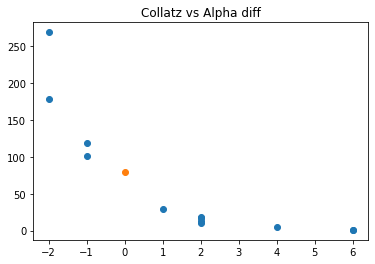

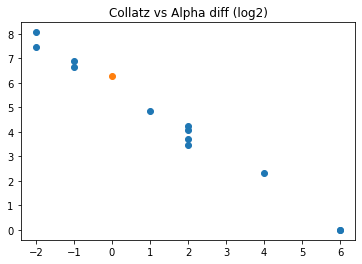

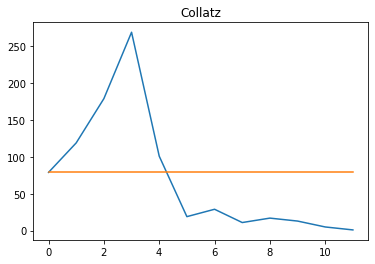

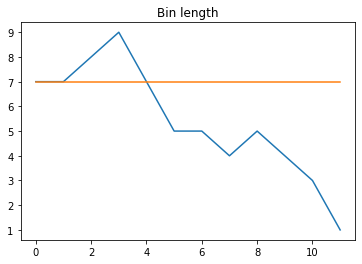

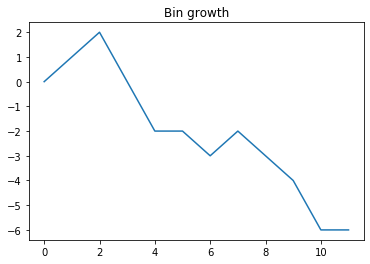

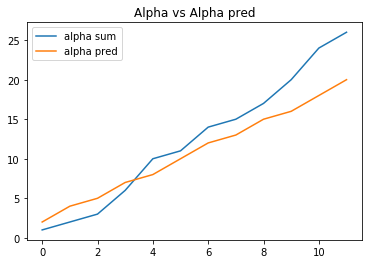

In [10]:
# Plot results
plt.figure()
plt.title("Collatz vs Alpha diff")
plt.plot(analysis_frame["alpha_diff"], analysis_frame["next_odd"],  "o")
plt.plot(0, START_VALUE,  "o")


plt.figure()
plt.title("Collatz vs Alpha diff (log2)")
plt.plot(analysis_frame["alpha_diff"], analysis_frame["next_odd"].apply(log2),  "o")
plt.plot(0, log2(START_VALUE),  "o")

plt.figure()
plt.title("Collatz")
plt.plot(analysis_frame["collatz"], "-")
plt.plot(analysis_frame["v1"])

plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")
plt.plot(analysis_frame["bin_len1"], "-")

plt.figure()
plt.title("Bin growth")
plt.plot(analysis_frame["bin_growth"], "-")

plt.figure()
plt.title("Alpha vs Alpha pred")
plt.plot(analysis_frame["alpha_sum"], "-", label="alpha sum")
plt.plot(analysis_frame["alpha_pred"], "-", label="alpha pred")
plt.legend()

plt.show()